In [1]:
# import numpy as np
# import scipy.sparse as sp
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# sx = np.array([[0, 1], [1, 0]])
# sy = np.array([[0, -1j], [1j, 0]])
# sz = np.array([[1, 0], [0, -1]])

# def H_kohei_Lx_Ly(Lx, Ly, t, m_vals, gamma):
#     H = np.zeros((2*Lx*Ly, 2*Lx*Ly), dtype=np.complex128)
    
#     for y in range(Ly):
#         for x in range(Lx-1):
#             H[2*Lx*y + 2*x:2*Lx*y + 2*x+2, 2*Lx*y + 2*(x+1):2*Lx*y + 2*(x+1)+2] = (t[y,x]/2*(sx+1j*sy)).conjugate().transpose()
#             H[2*Lx*y + 2*(x+1):2*Lx*y + 2*(x+1)+2, 2*Lx*y + 2*x:2*Lx*y + 2*x+2] = (t[y,x]/2*(sx+1j*sy))
        
#         # H[2*Lx*y + 2*0:2*Lx*y + 2*0+2, 2*Lx*y + 2*Lx-2:2*Lx*y + 2*Lx] = 1/2*(sx+1j*sy) 
#         # H[2*Lx*y + 2*Lx-2:2*Lx*y + 2*Lx, 2*Lx*y + 2*0:2*Lx*y + 2*0+2] = 1/2*(sx+1j*sy).conjugate().transpose()
            
#     for x in range(Lx):
#         for y in range(Ly-1):
#             H[2*Lx*y + 2*x:2*Lx*y + 2*x+2, 2*Lx*(y+1) + 2*x:2*Lx*(y+1) + 2*x+2] = (t[y,x]/2*(sx+1j*sz))
#             H[2*Lx*(y+1) + 2*x:2*Lx*(y+1) + 2*x+2, 2*Lx*y + 2*x:2*Lx*y + 2*x+2] = (t[y,x]/2*(sx+1j*sz)).conjugate().transpose()
        
#         # H[2*x:2*x+2, 2*Lx*(Ly-1)+2*x:2*Lx*(Ly-1)+2*x+2] = (1/2*(sx+1j*sz)).conjugate().transpose()
#         # H[2*Lx*(Ly-1)+2*x:2*Lx*(Ly-1)+2*x+2, 2*x:2*x+2] = 1/2*(sx+1j*sz)
        
#     for x in range(Lx):
#         for y in range(Ly):
#             H[2*Lx*y + 2*x:2*Lx*y + 2*x+2, 2*Lx*y + 2*x:2*Lx*y + 2*x+2] = m_vals[y,x]*sx + 1j * gamma[y,x] * sy
    
#     return sp.csr_matrix(H)


# def H_four_layer_Lx_Ly_all(Lx, Ly, t, m_vals, gamma, T, Tp, Tpp):
#     H1 = H_kohei_Lx_Ly(Lx, Ly, t, m_vals, gamma)
#     H2 = H_kohei_Lx_Ly(Lx, Ly, t, m_vals, -gamma)
#     H3 = H_kohei_Lx_Ly(Lx, Ly, t, -m_vals, gamma)
#     H4 = H_kohei_Lx_Ly(Lx, Ly, t, -m_vals, -gamma)
    
#     size = 4*2*Lx*Ly
#     H_4_layer = sp.lil_matrix((size, size), dtype=np.complex128)
    
#     row_slice_1 = np.s_[0:2*Lx*Ly]
#     H_4_layer[row_slice_1, row_slice_1] = H1

#     row_slice_2 = np.s_[2*Lx*Ly:4*Lx*Ly]
#     H_4_layer[row_slice_2, row_slice_2] = H2

#     row_slice_3 = np.s_[4*Lx*Ly:6*Lx*Ly]
#     H_4_layer[row_slice_3, row_slice_3] = H3

#     row_slice_4 = np.s_[6*Lx*Ly:8*Lx*Ly]
#     H_4_layer[row_slice_4, row_slice_4] = H4
    
#     # when m_vals = 0, gamma = 0, T = 0, Tp = 0, Tpp = 0, the following lines are not needed
#     # but when m_vals =1, then yes

#     m_prime = np.reshape(m_vals, (1, Lx*Ly))
#     m_prime = m_prime * np.eye(Lx*Ly)
    
#     # H_4_layer[row_slice_1, row_slice_2] = T * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_2, row_slice_1] = T * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_3, row_slice_4] = T * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_4, row_slice_3] = T * sp.kron(m_prime, sp.eye(2), format='csr')

#     # H_4_layer[row_slice_2, row_slice_3] = Tpp * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_3, row_slice_2] = Tpp * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_1, row_slice_4] = Tpp * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_4, row_slice_1] = Tpp * sp.kron(m_prime, sp.eye(2), format='csr')

#     # H_4_layer[row_slice_1, row_slice_3] = Tp * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_3, row_slice_1] = Tp * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_2, row_slice_4] = Tp * sp.kron(m_prime, sp.eye(2), format='csr')
#     # H_4_layer[row_slice_4, row_slice_2] = Tp * sp.kron(m_prime, sp.eye(2), format='csr')

#     H_4_layer[row_slice_1, row_slice_2] = T * sp.eye(2*Lx*Ly, dtype=np.complex128)
#     H_4_layer[row_slice_2, row_slice_1] = T * sp.eye(2*Lx*Ly, dtype=np.complex128)
    
#     H_4_layer[row_slice_3, row_slice_4] = T * sp.eye(2*Lx*Ly, dtype=np.complex128)
#     H_4_layer[row_slice_4, row_slice_3] = T * sp.eye(2*Lx*Ly, dtype=np.complex128)
    
#     H_4_layer[row_slice_2, row_slice_3] = Tpp * sp.eye(2*Lx*Ly, dtype=np.complex128)
#     H_4_layer[row_slice_3, row_slice_2] = Tpp * sp.eye(2*Lx*Ly, dtype=np.complex128)
    
#     H_4_layer[row_slice_1, row_slice_4] = Tpp * sp.eye(2*Lx*Ly, dtype=np.complex128)
#     H_4_layer[row_slice_4, row_slice_1] = Tpp * sp.eye(2*Lx*Ly, dtype=np.complex128)
    
#     H_4_layer[row_slice_1, row_slice_3] = Tp * sp.eye(2*Lx*Ly, dtype=np.complex128)
#     H_4_layer[row_slice_3, row_slice_1] = Tp * sp.eye(2*Lx*Ly, dtype=np.complex128)
    
#     H_4_layer[row_slice_2, row_slice_4] = Tp * sp.eye(2*Lx*Ly, dtype=np.complex128)
#     H_4_layer[row_slice_4, row_slice_2] = Tp * sp.eye(2*Lx*Ly, dtype=np.complex128)
    
#     return H_4_layer.tocsr()


# def wavepacket_four_layer(psi0, t0, tmax, dt, H):    
#     def f(x, time):
#         return -1j * H.dot(x.T)
    
#     time = np.arange(t0, tmax, dt)
#     nsteps = len(time)
#     psi = np.zeros((nsteps, len(H)), dtype=np.complex128)
#     psi[0, :] = psi0
    
#     for i in range(1, nsteps):
#         k1 = f(psi[i-1, :], time[i-1])
#         k2 = f(psi[i-1, :] + 0.5*dt*k1, time[i-1] + 0.5*dt)
#         k3 = f(psi[i-1, :] + 0.5*dt*k2, time[i-1] + 0.5*dt)
#         k4 = f(psi[i-1, :] + dt*k3, time[i-1] + dt)
#         psi[i, :] = psi[i-1, :] + (dt/6.0) * (k1 + 2*k2 + 2*k3 + k4)
        
#     return psi, time, nsteps


# f0 = np.zeros((3,3))
# f0[1,2] = 1
# f0[2,1] = 1
# f0[0,1] = 1
# f0[1,0] = 1
# f0[1,1] = 1
# plt.imshow(f0, cmap='gray')

# # Fractal generation and visualization (unchanged)
# def fractal(n):
#     if n == 0:
#         return f0
#     else:
#         return np.kron(fractal(n-1), f0)



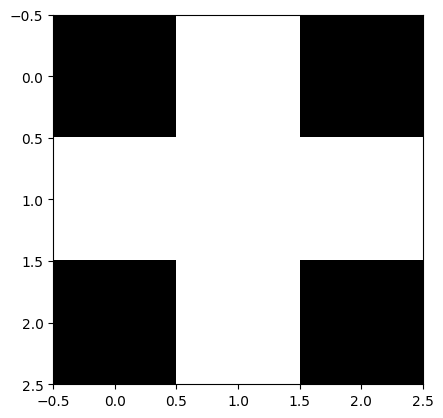

In [2]:
%run fractal_function_home.py

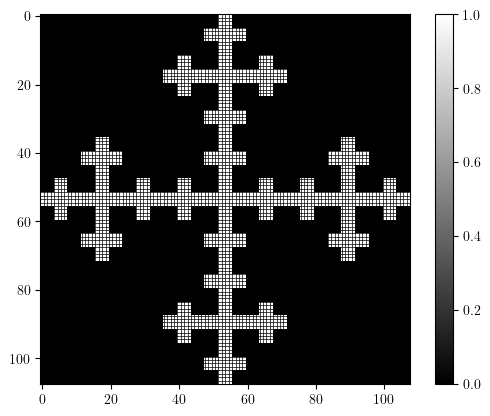

In [3]:
n = 2
f = fractal(n)
wid = 4
f_new = np.kron(f, np.ones((wid,wid)))
plt.imshow(f_new, cmap='gray')
# plot the grid
for i in range(1, len(f_new)):
    plt.axhline(i-0.5, color='black', lw=0.5)
    plt.axvline(i-0.5, color='black', lw=0.5)
plt.colorbar()
m_vals = f_new
t = 1 * m_vals
gamma = 0.0 * m_vals

Lx = len(m_vals)
Ly = len(m_vals)

T = 0.
Ts = 0.5
To = 0.5


H_all = H_four_layer_Lx_Ly_all(Lx, Ly, t, m_vals, gamma, T, Ts, To)

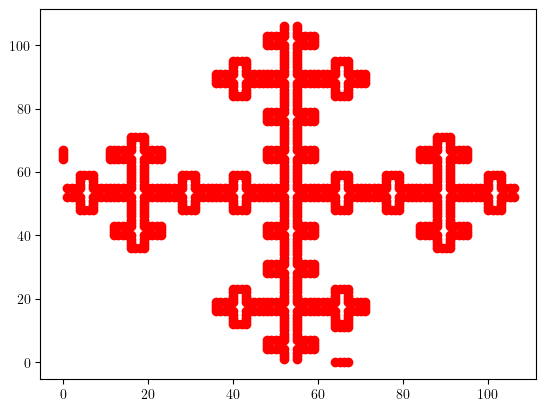

In [4]:
# find the edges
# include the edges that are on x=0, x=Lx-1, y=0, y=Ly-1
edges = []
for i in range(1, len(m_vals)-1):
    for j in range(1, len(m_vals)-1):
        if m_vals[i,j] == 1:
            if m_vals[i-1, j] == 0 or m_vals[i+1, j] == 0 or m_vals[i, j-1] == 0 or m_vals[i, j+1] == 0 or m_vals[i-1, j-1] == 0 or m_vals[i-1, j+1] == 0 or m_vals[i+1, j-1] == 0 or m_vals[i+1, j+1] == 0 or i == 0 or i == len(m_vals)-1 or j == 0 or j == len(m_vals)-1 or i ==0 or i == len(m_vals)-1 or j == 0 or j == len(m_vals)-1:
                edges.append((i,j))

edges.extend((0, i) for i in range(wid*2**(2*n), wid*(2**(2*n)+1)))
edges.extend((i, 0) for i in range(wid*2**(2*n), wid*(2**(2*n)+1)))
edges.extend((11, i) for i in range(wid*2**(2*n), wid*(2**(2*n)+1)))
edges.extend((i, 11) for i in range(wid*2**(2*n), wid*(2**(2*n)+1)))


# plot the edges
for edge in edges:
    plt.plot(edge[1], edge[0], 'ro')
edges_1D = []
for edge in edges:
    edges_1D.append(edge[0]*Lx + edge[1])

In [5]:
sparse_memory = (H_all.data.nbytes + H_all.indptr.nbytes + H_all.indices.nbytes) / 1e9
print(f"Memory usage of sparse matrix: {sparse_memory:.6f} GB")

Memory usage of sparse matrix: 0.001788 GB


In [6]:
def wavepacket_four_layer(psi0, t0, tmax, dt, H):    
    def f(x, time):
        return -1j * H.dot(x.T)
    
    time = np.arange(t0, tmax, dt)
    nsteps = len(time)
    psi = np.zeros((nsteps, 8*Lx*Ly), dtype=np.complex64)
    psi[0, :] = psi0
    
    for i in range(1, nsteps):
        k1 = f(psi[i-1, :], time[i-1])
        k2 = f(psi[i-1, :] + 0.5*dt*k1, time[i-1] + 0.5*dt)
        k3 = f(psi[i-1, :] + 0.5*dt*k2, time[i-1] + 0.5*dt)
        k4 = f(psi[i-1, :] + dt*k3, time[i-1] + dt)
        psi[i, :] = psi[i-1, :] + (dt/6.0) * (k1 + 2*k2 + 2*k3 + k4)
        
    return psi, time, nsteps

In [7]:
# Initialize the initial wavefunction
psi0 = np.zeros((1, 8*Lx*Ly), dtype=np.complex128)

# Define the initial conditions
## randomly choose the initial position from the edges
# x1, y1 = edges[np.random.randint(0, len(edges))]
# x2, y2 = edges[np.random.randint(0, len(edges))]
# x3, y3 = edges[np.random.randint(0, len(edges))]
# x4, y4 = edges[np.random.randint(0, len(edges))]

x1 = Lx//2
y1 = Ly//2
x2 = Lx//2
y2 = Ly//2
x3 = Lx//2
y3 = Ly//2
x4 = Lx//2
y4 = Ly//2


# Set the initial wavefunction components
psi0[0, 2*Lx*y1 + 2*x1] = 1
psi0[0, 2*Lx*Ly*1 + 2*Lx*y2 + 2*x2] = 1
psi0[0, 2*Lx*Ly*2 + 2*Lx*y3 + 2*x3] = 1
psi0[0, 2*Lx*Ly*3 + 2*Lx*y4 + 2*x4] = 1

# Time evolution parameters
t0 = 0
tmax = 6000
dt = 0.5

# Shift Hamiltonian to avoid numerical issues
Eoff = 0.0 * 1j
H_shift = H_all - Eoff * sp.eye(8*Lx*Ly, dtype=np.complex128)

# Perform time evolution
psi, time, nsteps = wavepacket_four_layer(psi0, t0, tmax, dt, H_shift)

# m_prime = np.reshape(m_vals, (1, Lx*Ly))
# m_prime = m_prime * np.eye(Lx*Ly)
# m_prime = np.kron(m_prime, np.eye(2))
# m_prime_4 = np.kron(np.eye(4), m_prime)

# psi = np.dot(psi, m_prime_4)

# Allocate memory for the state evolution
V1 = np.zeros((nsteps, Lx*Ly), dtype=np.complex128)
V2 = np.zeros((nsteps, Lx*Ly), dtype=np.complex128)
V3 = np.zeros((nsteps, Lx*Ly), dtype=np.complex128)
V4 = np.zeros((nsteps, Lx*Ly), dtype=np.complex128)

# Compute the probability density for each layer
for i in range(Lx*Ly):
    V1[:, i] = np.abs(psi[:, 2*i])**2 + np.abs(psi[:, 2*i+1])**2
    V2[:, i] = np.abs(psi[:, 2*i+2*Lx*Ly])**2 + np.abs(psi[:, 2*i+1+2*Lx*Ly])**2
    V3[:, i] = np.abs(psi[:, 2*i+4*Lx*Ly])**2 + np.abs(psi[:, 2*i+1+4*Lx*Ly])**2
    V4[:, i] = np.abs(psi[:, 2*i+6*Lx*Ly])**2 + np.abs(psi[:, 2*i+1+6*Lx*Ly])**2

# Reshape the data for visualization
eigenstate_1 = np.reshape(V1, (nsteps, Ly, Lx))
eigenstate_2 = np.reshape(V2, (nsteps, Ly, Lx))
eigenstate_3 = np.reshape(V3, (nsteps, Ly, Lx))
eigenstate_4 = np.reshape(V4, (nsteps, Ly, Lx))

# Print the maximum values of each eigenstate
print(np.max(eigenstate_1))
print(np.max(eigenstate_2))
print(np.max(eigenstate_3))
print(np.max(eigenstate_4))


(1+0j)
(1+0j)
(1+0j)
(1+0j)


In [8]:
x1, y1

(54, 54)

In [9]:
psi_memory = psi.nbytes / 1e9  # Convert bytes to GB
V1_memory = V1.nbytes / 1e9
V2_memory = V2.nbytes / 1e9
V3_memory = V3.nbytes / 1e9
V4_memory = V4.nbytes / 1e9

total_memory = psi_memory + V1_memory + V2_memory + V3_memory + V4_memory + sparse_memory


print(f"Memory usage of psi: {psi_memory:.6f} GB")
print(f"Memory usage of V1: {V1_memory:.6f} GB")
print(f"Memory usage of V2: {V2_memory:.6f} GB")
print(f"Memory usage of V3: {V3_memory:.6f} GB")
print(f"Memory usage of V4: {V4_memory:.6f} GB")
print(f"Total memory usage: {total_memory:.6f} GB")


Memory usage of psi: 8.957952 GB
Memory usage of V1: 2.239488 GB
Memory usage of V2: 2.239488 GB
Memory usage of V3: 2.239488 GB
Memory usage of V4: 2.239488 GB
Total memory usage: 17.917692 GB


In [10]:
# compute the overlap between the eigenstates and edges
overlap = np.zeros((4, nsteps))  # Ensure overlap matches required dimensions

for i in range(nsteps):
    for j, V in enumerate([V1, V2, V3, V4]):  # Iterate over V1, V2, V3, V4
        total_sum = np.sum(V[i, :])  # Total sum for the current V matrix
        
        if total_sum == 0:  # Handle cases where the sum is zero
            overlap[j, i] = 0
        else:
            overlap[j, i] = abs(np.sum(V[i, edges_1D]) / total_sum) - (1-abs(np.sum(V[i, edges_1D]) / total_sum)) * (len(edges_1D)/5**(n+1)/wid**2)


In [11]:
overlap_herm = overlap

(2084979.25+0j)
(2390362.75+0j)
(2311889.75+0j)
(1747896.625+0j)


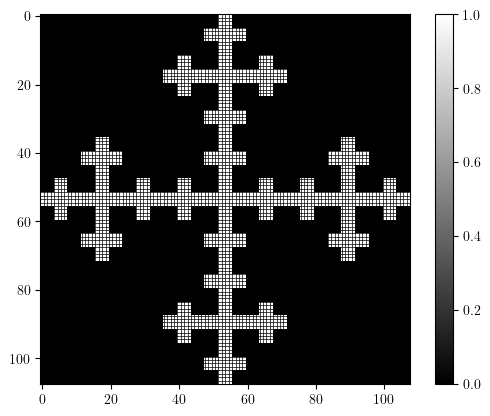

In [12]:
n = 2
f = fractal(n)
wid = 4
f_new = np.kron(f, np.ones((wid,wid)))
plt.imshow(f_new, cmap='gray')
# plot the grid
for i in range(1, len(f_new)):
    plt.axhline(i-0.5, color='black', lw=0.5)
    plt.axvline(i-0.5, color='black', lw=0.5)
plt.colorbar()
m_vals = f_new
t = 1 * m_vals
gamma = 0.02 * m_vals

Lx = len(m_vals)
Ly = len(m_vals)

T = 0.
Ts = 0.5
To = 0.5


H_all = H_four_layer_Lx_Ly_all(Lx, Ly, t, m_vals, gamma, T, Ts, To)

# Initialize the initial wavefunction
psi0 = np.zeros((1, 8*Lx*Ly), dtype=np.complex128)

# Define the initial conditions
## randomly choose the initial position from the edges
# x1, y1 = edges[np.random.randint(0, len(edges))]
# x2, y2 = edges[np.random.randint(0, len(edges))]
# x3, y3 = edges[np.random.randint(0, len(edges))]
# x4, y4 = edges[np.random.randint(0, len(edges))]

x1 = Lx//2
y1 = Ly//2
x2 = Lx//2
y2 = Ly//2
x3 = Lx//2
y3 = Ly//2
x4 = Lx//2
y4 = Ly//2


# Set the initial wavefunction components
psi0[0, 2*Lx*y1 + 2*x1] = 1
psi0[0, 2*Lx*Ly*1 + 2*Lx*y2 + 2*x2] = 1
psi0[0, 2*Lx*Ly*2 + 2*Lx*y3 + 2*x3] = 1
psi0[0, 2*Lx*Ly*3 + 2*Lx*y4 + 2*x4] = 1

# Time evolution parameters
# t0 = 0
# tmax = 1000
# dt = 0.5

# Shift Hamiltonian to avoid numerical issues
Eoff = 0.0 * 1j
H_shift = H_all - Eoff * sp.eye(8*Lx*Ly, dtype=np.complex128)

# Perform time evolution
psi, time, nsteps = wavepacket_four_layer(psi0, t0, tmax, dt, H_shift)

# m_prime = np.reshape(m_vals, (1, Lx*Ly))
# m_prime = m_prime * np.eye(Lx*Ly)
# m_prime = np.kron(m_prime, np.eye(2))
# m_prime_4 = np.kron(np.eye(4), m_prime)

# psi = np.dot(psi, m_prime_4)

# Allocate memory for the state evolution
V1 = np.zeros((nsteps, Lx*Ly), dtype=np.complex128)
V2 = np.zeros((nsteps, Lx*Ly), dtype=np.complex128)
V3 = np.zeros((nsteps, Lx*Ly), dtype=np.complex128)
V4 = np.zeros((nsteps, Lx*Ly), dtype=np.complex128)

# Compute the probability density for each layer
for i in range(Lx*Ly):
    V1[:, i] = np.abs(psi[:, 2*i])**2 + np.abs(psi[:, 2*i+1])**2
    V2[:, i] = np.abs(psi[:, 2*i+2*Lx*Ly])**2 + np.abs(psi[:, 2*i+1+2*Lx*Ly])**2
    V3[:, i] = np.abs(psi[:, 2*i+4*Lx*Ly])**2 + np.abs(psi[:, 2*i+1+4*Lx*Ly])**2
    V4[:, i] = np.abs(psi[:, 2*i+6*Lx*Ly])**2 + np.abs(psi[:, 2*i+1+6*Lx*Ly])**2

# Reshape the data for visualization
eigenstate_1 = np.reshape(V1, (nsteps, Ly, Lx))
eigenstate_2 = np.reshape(V2, (nsteps, Ly, Lx))
eigenstate_3 = np.reshape(V3, (nsteps, Ly, Lx))
eigenstate_4 = np.reshape(V4, (nsteps, Ly, Lx))

# Print the maximum values of each eigenstate
print(np.max(eigenstate_1))
print(np.max(eigenstate_2))
print(np.max(eigenstate_3))
print(np.max(eigenstate_4))

# compute the overlap between the eigenstates and edges
overlap = np.zeros((4, nsteps))  # Ensure overlap matches required dimensions

for i in range(nsteps):
    for j, V in enumerate([V1, V2, V3, V4]):  # Iterate over V1, V2, V3, V4
        total_sum = np.sum(V[i, :])  # Total sum for the current V matrix
        
        if total_sum == 0:  # Handle cases where the sum is zero
            overlap[j, i] = 0
        else:
            overlap[j, i] = abs(np.sum(V[i, edges_1D]) / total_sum) - (1-abs(np.sum(V[i, edges_1D]) / total_sum)) * (len(edges_1D)/5**(n+1)/wid**2)


In [13]:
# overlap_nonherm = overlap

In [14]:
# plt.figure(figsize=(5, 4)) 
# plt.plot(time, overlap_herm[0, :], label='Hermitian', c='gray')
# plt.plot(time, overlap_herm[1, :], c='gray')
# plt.plot(time, overlap_herm[2, :], c='gray')
# plt.plot(time, overlap_herm[3, :], c='gray')
# plt.plot(time, overlap_nonherm[0, :], label='Layer 1')
# plt.plot(time, overlap_nonherm[1, :], label='Layer 2')
# plt.plot(time, overlap_nonherm[2, :], label='Layer 3')
# plt.plot(time, overlap_nonherm[3, :], label='Layer 4')
# # plt.grid()

# plt.xlabel('Time $t$', fontsize=16)
# plt.ylabel(r'$\rho_{\text{Edge}}(t)$', fontsize=18)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.legend(fontsize=13, loc='lower right')
# plt.tight_layout()
# plt.savefig('fractal_eor_1st.png', dpi=300)

In [15]:
# np.save('fractal_eor_3rd.npy', overlap_nonherm)
# np.save('fractal_eor_herm_3rd.npy', overlap_herm)
# np.save('fractal_eor_time_3rd.npy', time)


In [16]:
# # replace eigenstate_1 zeros with e-10
# eigenstate_1[eigenstate_1 == 0] = 1e-10
# plt.figure(figsize=(5, 4))
# n0 = 0
# vm = 0
# vmin1 = -1
# # plot the edges
# for edge in edges:
#     plt.plot(edge[1], edge[0], c='gray', marker='*', markersize=10, alpha=0.5)
# plt.imshow(np.log(abs(eigenstate_1[n0,:,:])+abs(eigenstate_2[n0,:,:])+abs(eigenstate_3[n0,:,:])+abs(eigenstate_4[n0,:,:])), animated=True, aspect='auto', cmap='CMRmap', vmax=vm, vmin=vmin1)
# plt.xticks([0, 5, 11], [1, 6, 12], fontsize=16)
# plt.yticks([0, 5, 11], [1, 6, 12], fontsize=16)
# # label the colormap, colorbar
# cbar = plt.colorbar()
# cbar.set_label(r'$\log\Psi^2(\textbf{r}, t)$', fontsize=18, rotation=0, labelpad=-10, y=0.95)
# cbar.ax.tick_params(labelsize=16)
# # label colorbar -1 as empty
# cbar.set_ticks([-1, -0.7, -0.3, 0])
# cbar.set_ticklabels(['Empty', '$-0.7$', '$-0.3$', f'${vm}$'])
# # add text at x=2, y=2, bold
# plt.text(-0.3, 1, '$t=0$', fontsize=16, color='white',fontweight='bold')

# plt.xlabel(r'$x$', fontsize=18)
# plt.ylabel(r'$y$', fontsize=18)
# plt.tight_layout()
# plt.savefig('fractal_1st_snapshot_1.png', dpi=300)

In [17]:
# # replace eigenstate_1 zeros with e-10
# eigenstate_1[eigenstate_1 == 0] = 1e-10
# plt.figure(figsize=(5, 4))
# n0 = nsteps // 4 * 1
# vm = -3
# vmin1 = -6
# # plot the edges
# for edge in edges:
#     plt.plot(edge[1], edge[0], c='gray', marker='*', markersize=10, alpha=0.6)
# plt.imshow(np.log(abs(eigenstate_1[n0,:,:])+abs(eigenstate_2[n0,:,:])+abs(eigenstate_3[n0,:,:])+abs(eigenstate_4[n0,:,:])), animated=True, aspect='auto', cmap='CMRmap', vmax=vm, vmin=vmin1)
# plt.xticks([0, 5, 11], [1, 6, 12], fontsize=16)
# plt.yticks([0, 5, 11], [1, 6, 12], fontsize=16)
# # label the colormap, colorbar
# cbar = plt.colorbar()
# cbar.set_label(r'$\log\Psi^2(\textbf{r}, t)$', fontsize=18, rotation=0, labelpad=-10, y=0.95)
# cbar.ax.tick_params(labelsize=16)
# # label colorbar -1 as empty
# cbar.set_ticks([-6, -5, -4, -3, -2])
# cbar.set_ticklabels(['Empty', '$-5$', '$-4$', '$-3$', f'${vm}$'])
# # add text at x=2, y=2, bold
# plt.text(-0.3, 1, '$t=500$', fontsize=16, color='white',fontweight='bold')

# plt.xlabel(r'$x$', fontsize=18)
# plt.ylabel(r'$y$', fontsize=18)
# plt.tight_layout()
# plt.savefig('fractal_1st_snapshot_2.png', dpi=300)

In [18]:
# # replace eigenstate_1 zeros with e-10
# eigenstate_1[eigenstate_1 == 0] = 1e-10
# plt.figure(figsize=(5, 4))
# n0 = nsteps // 3 * 1
# vm = -2
# vmin1 = -6
# # plot the edges
# for edge in edges:
#     plt.plot(edge[1], edge[0], c='gray', marker='*', markersize=10, alpha=0.6)
# plt.imshow(np.log(abs(eigenstate_1[n0,:,:])+abs(eigenstate_2[n0,:,:])+abs(eigenstate_3[n0,:,:])+abs(eigenstate_4[n0,:,:])), animated=True, aspect='auto', cmap='CMRmap', vmax=vm, vmin=vmin1)
# plt.xticks([0, 5, 11], [1, 6, 12], fontsize=16)
# plt.yticks([0, 5, 11], [1, 6, 12], fontsize=16)
# # label the colormap, colorbar
# cbar = plt.colorbar()
# cbar.set_label(r'$\log\Psi^2(\textbf{r}, t)$', fontsize=18, rotation=0, labelpad=-10, y=0.95)
# cbar.ax.tick_params(labelsize=16)
# # label colorbar -1 as empty
# cbar.set_ticks([-6, -5, -4, -3, -2])
# cbar.set_ticklabels(['Empty', '$-5$', '$-4$', '$-3$', f'${vm}$'])
# # add text at x=2, y=2, bold
# plt.text(-0.3, 1, '$t=1000$', fontsize=16, color='white',fontweight='bold')

# plt.xlabel(r'$x$', fontsize=18)
# plt.ylabel(r'$y$', fontsize=18)
# plt.tight_layout()
# plt.savefig('fractal_1st_snapshot_3.png', dpi=300)

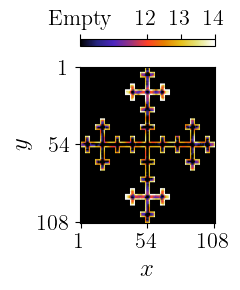

In [31]:
# replace eigenstate_1 zeros with e-10
eigenstate_1[eigenstate_1 == 0] = 1e-10
plt.figure(figsize=(2.5, 3))
n0 = -1
vm = 14
vmin1 = 10
# plot the edges
# for edge in edges:
#     plt.plot(edge[1], edge[0], c='gray', marker='*', markersize=2, alpha=0.5)
plt.imshow(np.log(abs(eigenstate_1[n0,:,:])+abs(eigenstate_2[n0,:,:])+abs(eigenstate_3[n0,:,:])+abs(eigenstate_4[n0,:,:])), animated=True, aspect='auto', cmap='CMRmap', vmax=vm, vmin=vmin1)
plt.xticks([0, 53, 107], [1, 54, 108], fontsize=16)
plt.yticks([0, 53, 107], [1, 54, 108], fontsize=16)
# label the colormap, colorbar
# cbar = plt.colorbar()
# cbar.set_label(r'$\log\Psi^2(\textbf{r}, t)$', fontsize=18, rotation=0, labelpad=-10, y=0.95)
# cbar.ax.tick_params(labelsize=16)

# horizontal colorbar below the axes
cbar = plt.colorbar(orientation='horizontal',location='top', pad=0.1)
# cbar.set_label(r'$\log\Psi^2(\textbf{r}, t)$', fontsize=18, labelpad=6)  # rotation=0 默认为水平
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([10, 12, 13, 14])
cbar.set_ticklabels(['Empty', '$12$', '$13$', '$14$'])
# cbar.set_ticklabels(['Empty', '$-1$', '$1$','$3$'])


# label colorbar -1 as empty
# cbar.set_ticks([-1, -0.7, -0.3, 0])
# cbar.set_ticklabels(['Empty', '$-0.7$', '$-0.3$', f'${vm}$'])
# # add text at x=2, y=2, bold
# plt.text(5, 10, '$t=8000$', fontsize=16, color='white',fontweight='bold')
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.tight_layout()
plt.savefig('fractal_3rd_snapshot_4.png', dpi=1200)